<a href="https://colab.research.google.com/github/Giovanni2132/NumberClassificator/blob/main/NumberClassificator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importazione del dataset da openml

In [1]:
import pandas as pd
from google.colab import data_table

data_table.enable_dataframe_formatter()

In [2]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml("mnist_784",version=1)
print(mnist.keys())
print(mnist)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.

Ora bisogna convertire i dati in un formato che deve essere manipolato in maniera semplice, si creerà la variabile X che avrà le informazioni per quanto riguarda l'immagine, e la y è la variabile che si vuole predire

In [3]:
X,y=mnist["data"],mnist["target"]
print(X.head())
print(y.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       

Bisogna convertire la target variable in un intero di 8 bit

In [4]:
import numpy as np
from sklearn import preprocessing

y=y.astype(np.uint8)
classes=y.drop_duplicates().sort_values().tolist()

In [5]:
import pandas as pd


# Converti il dataset in un DataFrame di Pandas
mnist_df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
mnist_df['target'] = mnist.target

# Utilizza pd.isna() per contare i valori nulli
nan_mask = mnist_df.isna()
nan_count = nan_mask.sum()

print(nan_count)

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel781    0
pixel782    0
pixel783    0
pixel784    0
target      0
Length: 785, dtype: int64


In [6]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB
None


In [7]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Carica il dataset MNIST
(x_train, y_train), (_, _) = mnist.load_data()

# Calcola statistiche di base
mean_pixel_value = np.mean(x_train)
std_pixel_value = np.std(x_train)
min_pixel_value = np.min(x_train)
max_pixel_value = np.max(x_train)

# Stampa delle statistiche
print(f"Media del valore dei pixel: {mean_pixel_value}")
print(f"Deviazione standard del valore dei pixel: {std_pixel_value}")
print(f"Valore minimo del pixel: {min_pixel_value}")
print(f"Valore massimo del pixel: {max_pixel_value}")

11490434/11490434 [==============================] - 0s 0us/step
Media del valore dei pixel: 33.318421449829934
Deviazione standard del valore dei pixel: 78.56748998339798
Valore minimo del pixel: 0
Valore massimo del pixel: 255


Ora si divide il dataset in un testset e un trainingset

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (56000, 784)
Number transactions y_train dataset:  (56000,)
Number transactions X_test dataset:  (14000, 784)
Number transactions y_test dataset:  (14000,)


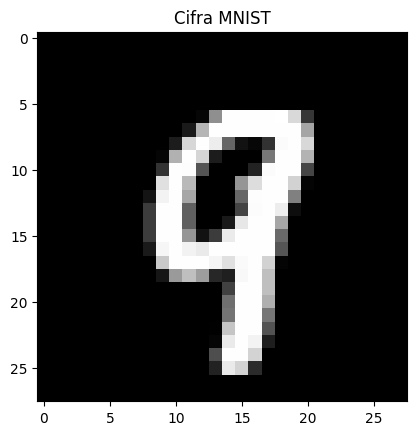

In [25]:
import matplotlib.pyplot as plt
import numpy as np


cifra = X.iloc[800]
cifra_array = cifra.to_numpy()

cifra_reshaped = cifra_array.reshape(28, 28)

plt.imshow(cifra_reshaped, cmap='gray')
plt.title("Cifra MNIST")
plt.show()


In [29]:
import matplotlib.pyplot as plt
import pandas as pd

pd.value_counts(mnist['target']).plot.bar()
plt.xlabel('target')
plt.ylabel('Frequency')
mnist["target"].value_counts()

TypeError: 'module' object is not subscriptable

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('std_scaler',StandardScaler())
])

X_train_prepared=num_pipeline.fit_transform(X_train)
X_test_prepared=num_pipeline.fit_transform(X_test)

In [12]:
import numpy as np

# Calcola il valore minimo e massimo per l'intero array
min_value = np.min(X_train_prepared)
max_value = np.max(X_train_prepared)

# Stampa i risultati
print("Valore Minimo Globale:", min_value)
print("Valore Massimo Globale:", max_value)

Valore Minimo Globale: -1.2802469936239342
Valore Massimo Globale: 236.64107842891528


**Random Forest**

In [13]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

rf_classifier = OneVsRestClassifier(
    make_pipeline(RandomForestClassifier(random_state=42))
)
rf_classifier.fit(X_train_prepared, y_train)

OneVsRestClassifier(estimator=Pipeline(steps=[('randomforestclassifier',
                                               RandomForestClassifier(random_state=42))]))

Accuracy: 0.9552857142857143
Precision: 0.9565594814651489
Recall: 0.9552857142857143


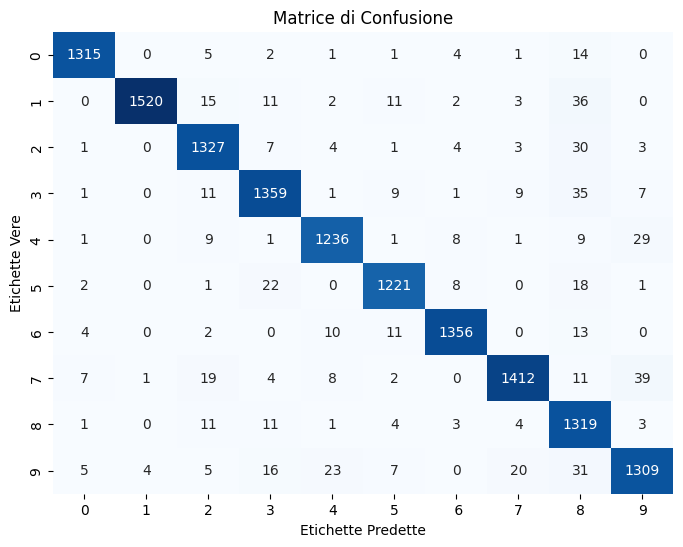

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns

y_train_pred =  rf_classifier.predict(X_test_prepared)


conf_matrix=confusion_matrix(y_test, y_train_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_train_pred))
print("Precision:",metrics.precision_score(y_test, y_train_pred,average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_train_pred,average='weighted'))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1', '2','3', '4', '5',' 6', '7', '8','9'],  # Sostituisci con le tue classi
            yticklabels=['0', '1', '2','3', '4', '5','6', '7', '8','9'],  # Sostituisci con le tue classi
            )
plt.xlabel('Etichette Predette')
plt.ylabel('Etichette Vere')
plt.title('Matrice di Confusione')
plt.show()

Accuracy: 0.8335714285714285
Precision: 0.8359834028555766
Recall: 0.8335714285714285


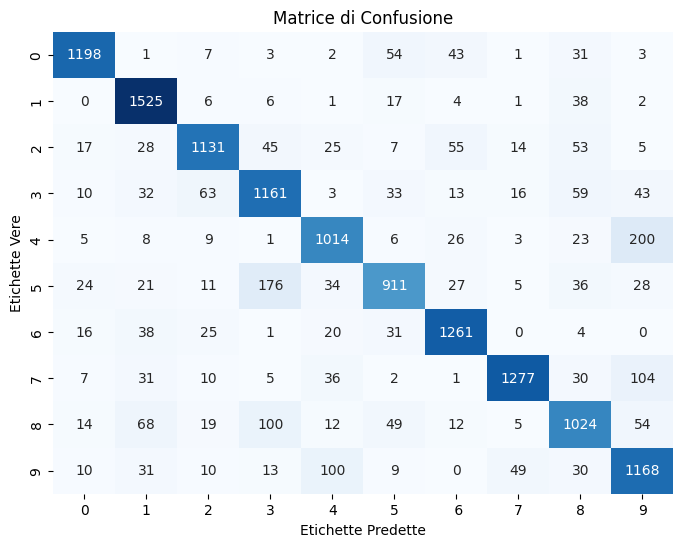

In [18]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

NB = BernoulliNB()

NB.fit(X_train_prepared, y_train)

prediction = NB.predict(X_test_prepared)

labels = np.unique(y_test)
confu_matrix=confusion_matrix(y_test, prediction)

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction,average='weighted'))
print("Recall:",metrics.recall_score(y_test, prediction,average='weighted'))
plt.figure(figsize=(8, 6))
sns.heatmap(confu_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1', '2','3', '4', '5',' 6', '7', '8','9'],  # Sostituisci con le tue classi
            yticklabels=['0', '1', '2','3', '4', '5','6', '7', '8','9'],  # Sostituisci con le tue classi
            )
plt.xlabel('Etichette Predette')
plt.ylabel('Etichette Vere')
plt.title('Matrice di Confusione')
plt.show()

Accuracy: 0.9207857142857143
Precision: 0.9210718828711004
Recall: 0.9207857142857143


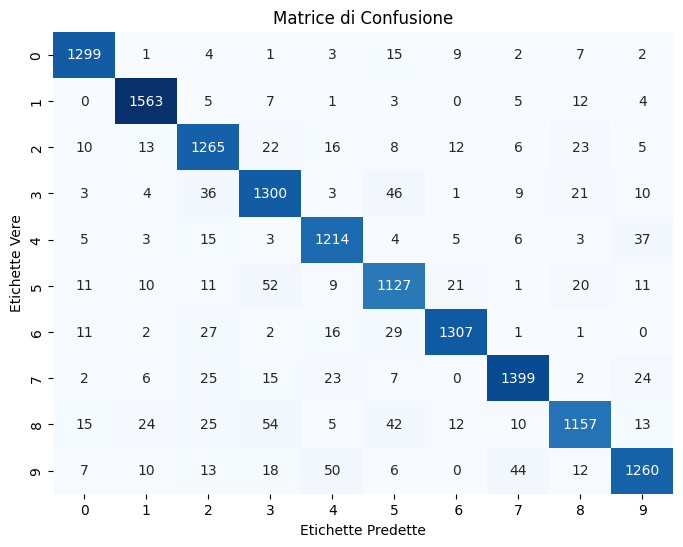

In [13]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model = SVC(kernel='linear', random_state=42)  # Specifica il kernel (lineare, RBF, polinomiale, ecc.)
model.fit(X_train_prepared, y_train)

# Predizione dei risultati
y_pred = model.predict(X_test_prepared)

labels = np.unique(y_test)

confusion_matrix=confusion_matrix(y_test, y_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted'))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1', '2','3', '4', '5',' 6', '7', '8','9'],  # Sostituisci con le tue classi
            yticklabels=['0', '1', '2','3', '4', '5','6', '7', '8','9'],  # Sostituisci con le tue classi
            )
plt.xlabel('Etichette Predette')
plt.ylabel('Etichette Vere')
plt.title('Matrice di Confusione')
plt.show()